GD 394 was observed again by TESS in Sectors 55 and 56

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec
import lightkurve as lk

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
search_result = lk.search_lightcurve('TIC 259773610')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 15,2019,SPOC,120,259773610,0.0
1,TESS Sector 15,2019,TESS-SPOC,1800,259773610,0.0
2,TESS Sector 15,2019,QLP,1800,259773610,0.0
3,TESS Sector 15,2019,TASOC,120,259773610,0.0
4,TESS Sector 15,2019,TASOC,1800,259773610,0.0
5,TESS Sector 15,2019,TASOC,1800,259773610,0.0
6,TESS Sector 16,2019,SPOC,120,259773610,0.0
7,TESS Sector 16,2019,TESS-SPOC,1800,259773610,0.0
8,TESS Sector 16,2019,QLP,1800,259773610,0.0


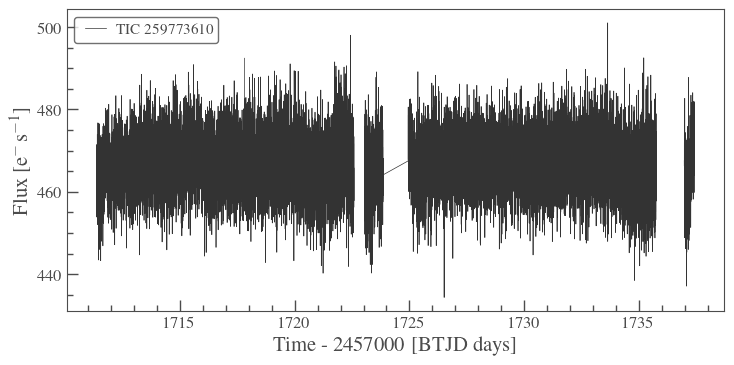

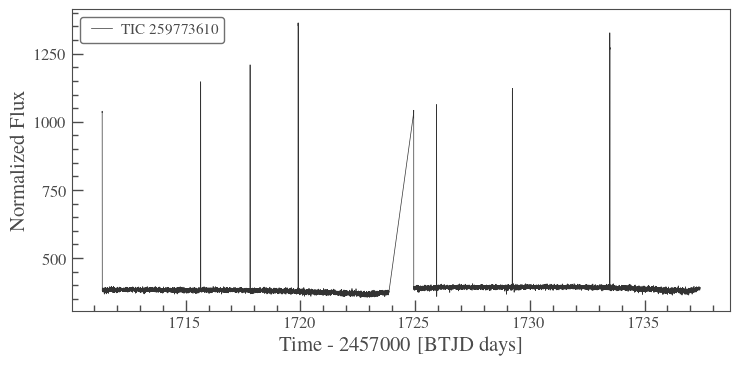

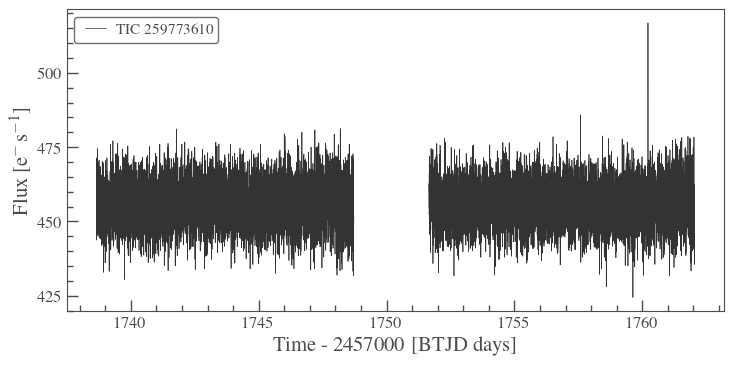

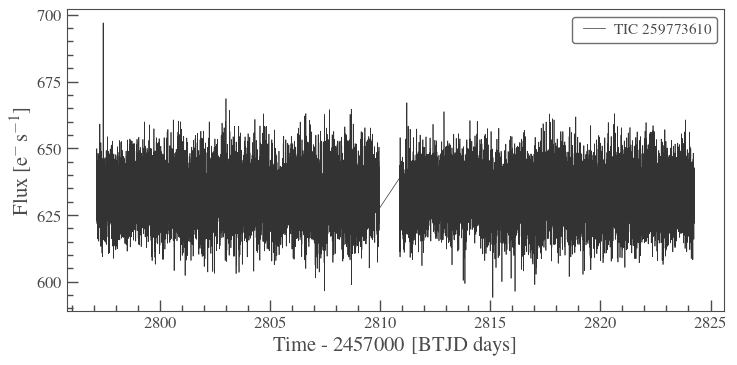

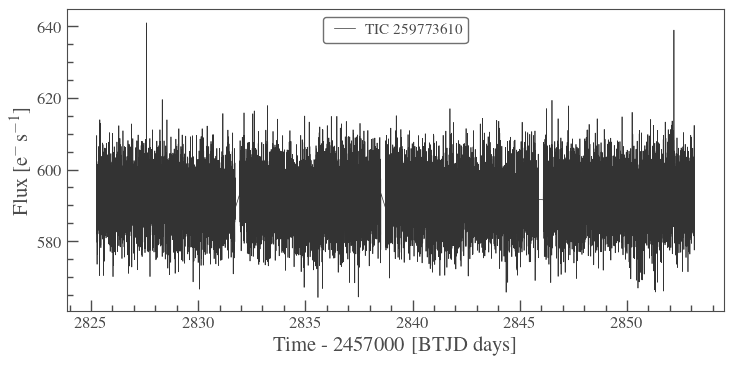

In [8]:
for sr in search_result:
    if sr.exptime[0].value == 120:
        lc = sr.download(download_dir='mastDownload/')
        lc.plot()

2.308607159483758 d


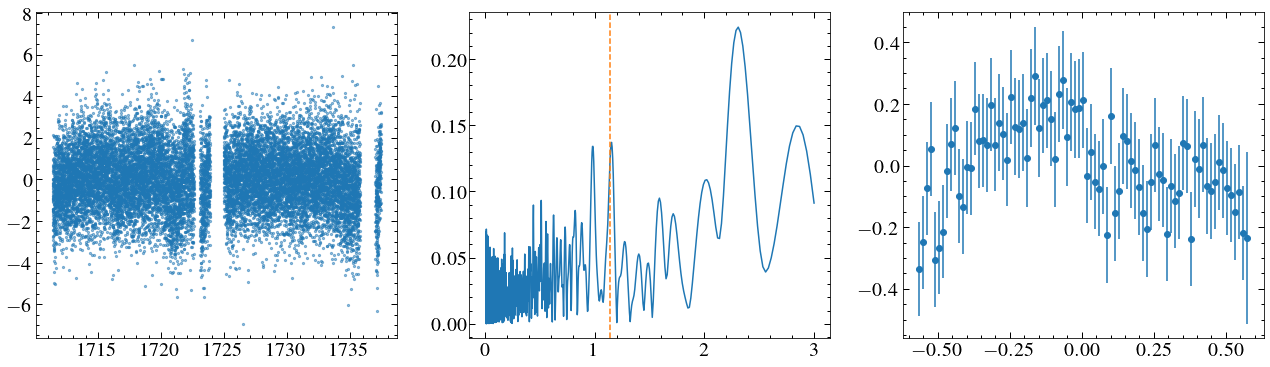

0.570342773945468 d


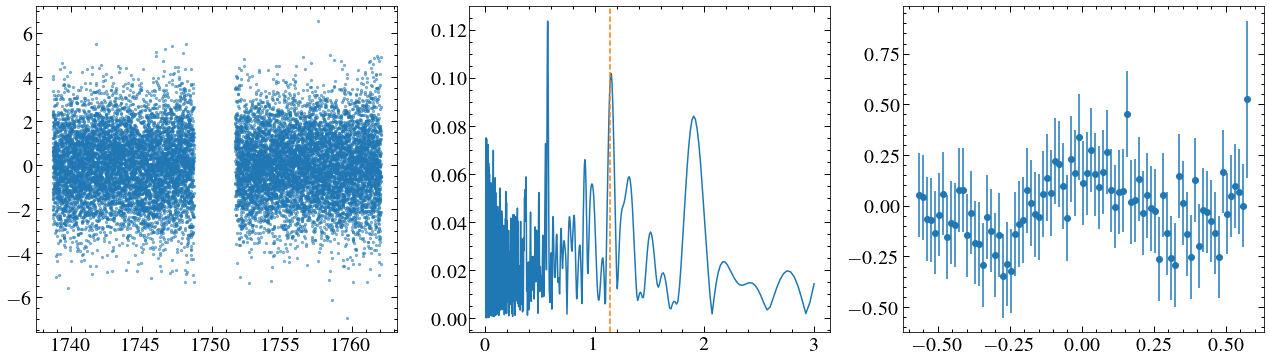

0.9858426775819805 d


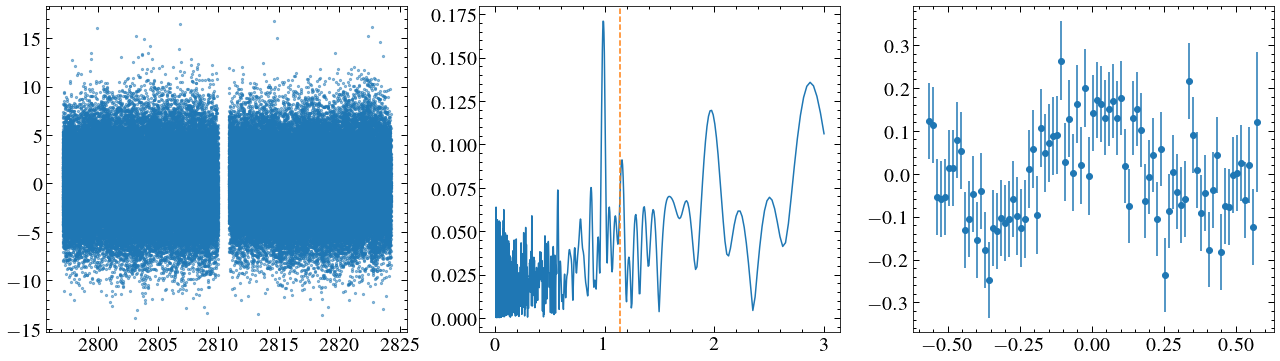

1.1429931980965744 d


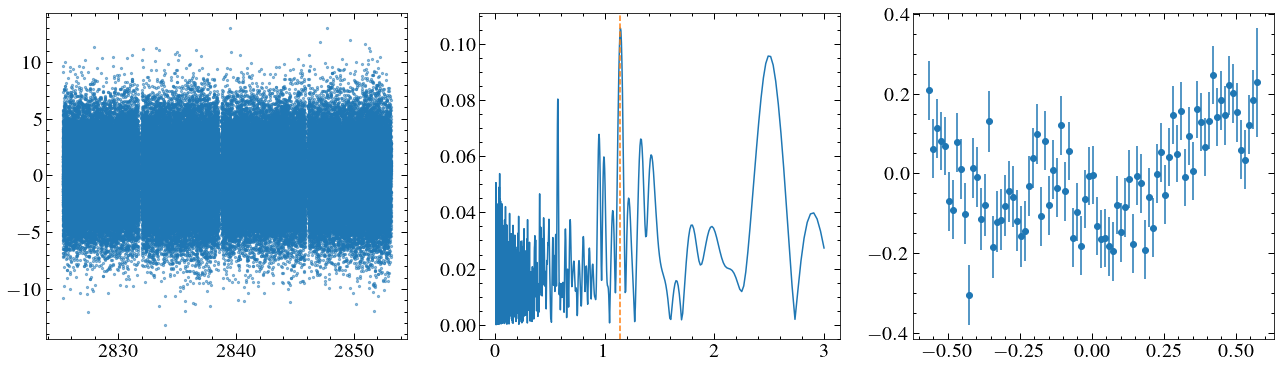

In [34]:
for i in [0, 6, 9, 11]:
    sr = search_result[i]
    # if sr.exptime[0].value == 120:
    lc = sr.download(download_dir='mastDownload/')
    plt.figure(figsize=(22, 6))
    lc = lc.remove_outliers()
    lcn=lc.normalize()
    lcn.flux = lcn.flux.value -1
    lcn.flux = lcn.flux*100
    lcn.flux_err = lcn.flux_err.value*100

    plt.subplot(131)
    plt.scatter(lcn.time.value, lcn.flux, alpha=0.5,  s=5, rasterized = True)

    pg = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=10*u.min, maximum_period = 3*u.d)

    plt.subplot(132)
    plt.plot(pg.period, pg.power)
    period = pg.period_at_max_power
    print(period)

    plt.axvline(1.14, ls='--', c='C1')

    lcf = lcn.fold(1.143*u.d).bin(20*u.min)
    plt.subplot(133)
    # plt.scatter(lcf.time.value, lcf.flux)
    plt.errorbar(lcf.time.value, lcf.flux, lcf.flux_err, marker='o', ls='none')

        
        
    plt.show()
        # lc.plot()

0.9896698093280468 d


<Figure size 1584x432 with 0 Axes>

<Figure size 1584x432 with 0 Axes>

<Figure size 1584x432 with 0 Axes>

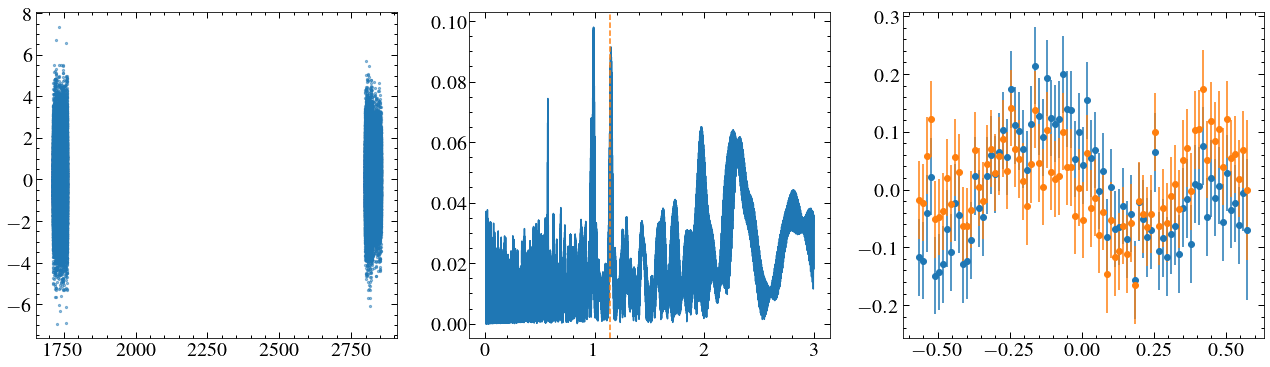

In [56]:
for i in [0, 6, 10, 12]:
    sr = search_result[i]
    # if sr.exptime[0].value == 120:
    lc = sr.download(download_dir='mastDownload/')

    plt.figure(figsize=(22, 6))
    lc = lc.remove_outliers()
    lcni=lc.normalize()
    lcni.flux = lcni.flux.value -1
    lcni.flux = lcni.flux*100
    lcni.flux_err = lcni.flux_err.value*100
    
    if i == 0:
        lcn = lcni
    else:
        lcn = lcn.append(lcni)
    
    
plt.subplot(131)
plt.scatter(lcn.time.value, lcn.flux, alpha=0.5,  s=5, rasterized = True)

pg = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=10*u.min, maximum_period = 3*u.d)

plt.subplot(132)
plt.plot(pg.period, pg.power)
period = pg.period_at_max_power
print(period)

plt.axvline(1.14, ls='--', c='C1')

lcf = lcn.fold(1.143*u.d).bin(20*u.min)
plt.subplot(133)
# plt.scatter(lcf.time.value, lcf.flux)
plt.errorbar(lcf.time.value, lcf.flux, lcf.flux_err, marker='o', ls='none')

nearmod = models.Sine1D(amplitude=0.1, frequency = 1/period.value, phase=0.3)
# print(nearmod)
time = lcf.time.value
# print(time)
modf = lcf.flux-nearmod(time)

plt.errorbar(lcf.time.value, modf, lcf.flux_err, marker='o', ls='none')


plt.show()

Still there!